In [2]:
import cv2 as cv
from PIL import Image
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import os


BASE_DATA_DIR = "../data"
CATS = "/cat images"
VIDEOS = "/videos"

def display_as_rgb(img):
  to_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  display(Image.fromarray(to_rgb))

os.listdir(BASE_DATA_DIR + CATS)

['cat-5.png', 'cat-1.png', 'cat-0.png', 'cat-2.png', 'cat-4.png', 'cat-3.png']

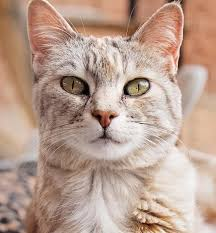

In [3]:
img = cv.imread(BASE_DATA_DIR + CATS + "/cat-3.png")
display_as_rgb(img)

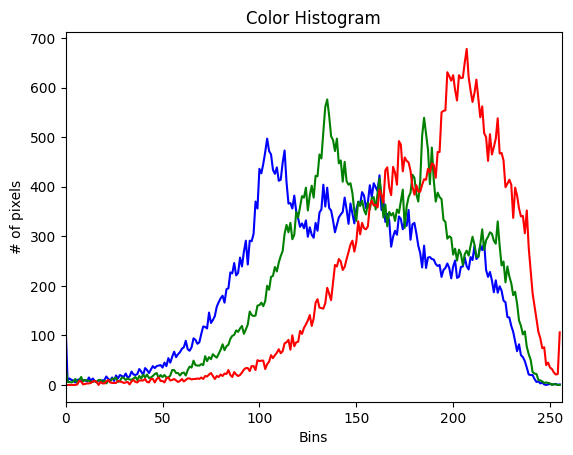

In [5]:
# color histogram
colors = ('b', 'g', 'r')
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
for i, col in enumerate(colors):
  hist = cv.calcHist([img], [i], None, [256], [0, 256])
  plt.plot(hist, color = col)
  plt.xlim([0, 256])
  
plt.show()

In [7]:
blank = np.zeros(img.shape[:2], dtype=np.uint8)

In [17]:
mask = cv.circle(blank.copy(), (img.shape[1] // 2, img.shape[0] // 2 - 20), 100, 255, -1)

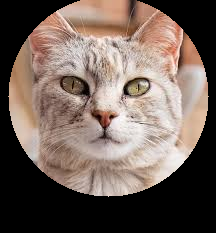

In [18]:
masked = cv.bitwise_and(img, img, mask=mask)
display_as_rgb(masked)

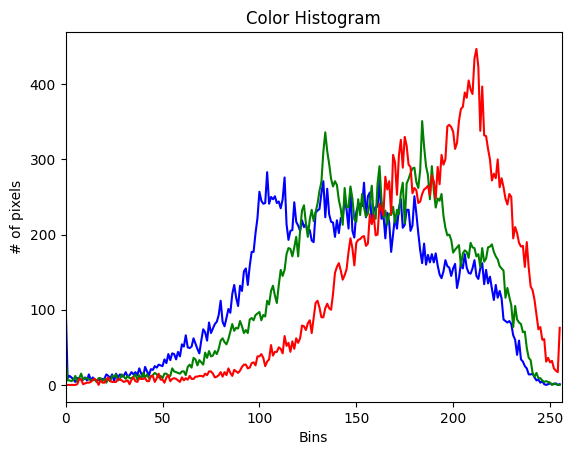

In [19]:
colors = ('b', 'g', 'r')
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
for i, col in enumerate(colors):
  hist = cv.calcHist([img], [i], mask, [256], [0, 256])
  plt.plot(hist, color = col)
  plt.xlim([0, 256])
  
plt.show()